# Pillow / CV2 visualizations

In [1]:
import cv2
from PIL import Image
import numpy as np

from __future__ import print_function

%matplotlib inline
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML


print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.1.0 


In [2]:
im = Image.open("lena.jpg")
print(im.format, im.size, im.mode)

BMP (512, 512) RGB


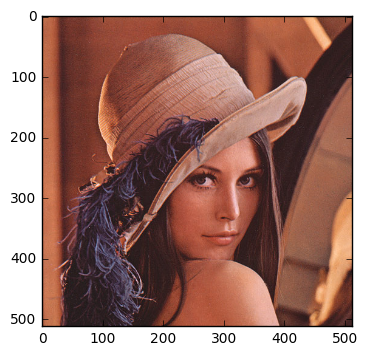

In [3]:
#im.show()
imshow(np.asarray(im))

# Loading into CV2 and displaying

Check matplotlib colormaps: [matplotlib.org/examples/color/colormaps_reference.html](https://matplotlib.org/examples/color/colormaps_reference.html)

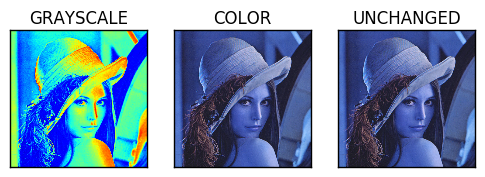

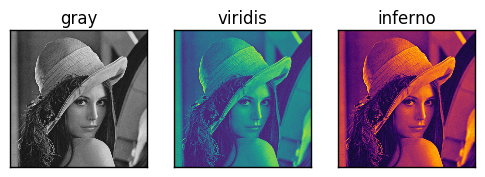

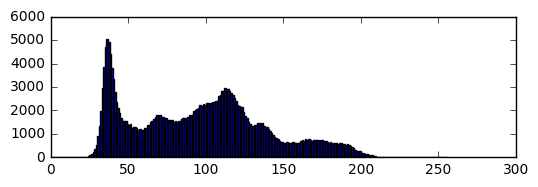

In [4]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE) # flag = 0
img2 = cv2.imread('lena.jpg',cv2.IMREAD_COLOR ) # flag = 1
img3 = cv2.imread('lena.jpg',cv2.IMREAD_UNCHANGED ) # flag = -1

display(HTML('<h3>Displaying img w flags</h3>'))

plt.subplot(231),plt.imshow(img),plt.title('GRAYSCALE'),   plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img2),plt.title('COLOR'),   plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(img3),plt.title('UNCHANGED'),   plt.xticks([]), plt.yticks([])
plt.show()

display(HTML('<h3>Displaying img with matplotlib colormaps</h3>'))

plt.subplot(234),plt.imshow(img,'gray'),plt.title('gray'),   plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(img,'viridis'),plt.title('viridis'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(img,'inferno'),plt.title('inferno'), plt.xticks([]), plt.yticks([])
plt.show()

# plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
# plt.show()

display(HTML('<h3>Displaying img histogram</h3>'))

plt.subplot(211).hist(img.ravel(),256,[0,256])
plt.show()

## Thresholding

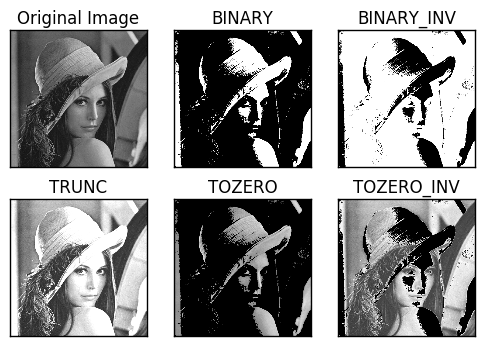

In [5]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## Edge detection (canny)

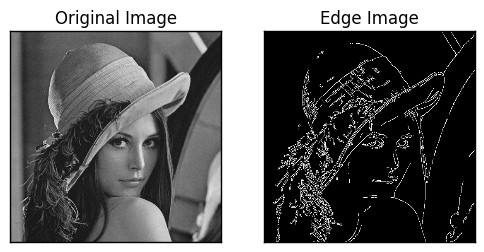

Shape of array is: (512, 512)


In [6]:
canny = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

print('Shape of array is: %s' % str(np.shape(canny)))

## Edge detection (sobel)

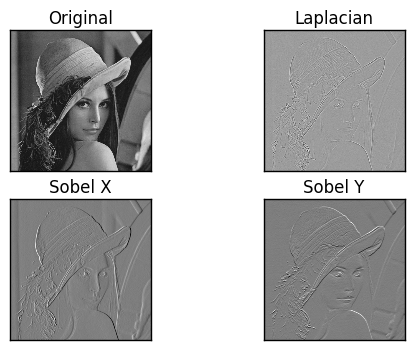

In [7]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_denoised = cv2.GaussianBlur(img,(3,3),0)

laplacian = cv2.Laplacian(img_denoised,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

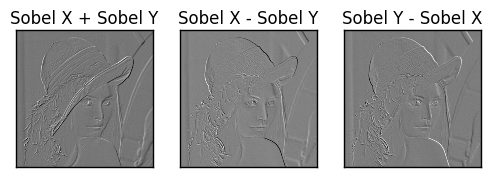

In [8]:
# Arithmetic operations on Sobel
###
sum_sobel = sobelx + sobely
plt.subplot(1,3,1),plt.imshow(sum_sobel,cmap = 'gray')
plt.title('Sobel X + Sobel Y'), plt.xticks([]), plt.yticks([])

#diff = cv2.subtract(sobelx, sum_sobel)
diff1_sobel = sobelx - sobely
plt.subplot(1,3,2),plt.imshow(diff1_sobel,cmap = 'gray')
plt.title('Sobel X - Sobel Y'), plt.xticks([]), plt.yticks([])

diff2_sobel = sobely - sobelx
plt.subplot(1,3,3),plt.imshow(diff2_sobel,cmap = 'gray')
plt.title('Sobel Y - Sobel X'), plt.xticks([]), plt.yticks([])

plt.rcParams["figure.figsize"] = (10,10)
plt.show()